In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sakshisatre/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\sakshisatre\titanic-dataset\versions\2


In [2]:
import pandas as pd
import numpy as np

In [3]:
df3 = pd.read_csv(path+'\\Titanic_Dataset.csv')
df3

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [4]:
df3['sex'] = df3['sex'].map({'male': 1, 'female': 0})
df3['embarked_C'] = df3['embarked'].fillna('Q').map({'C': 1, 'Q': 0, 'S': 0}) #C = Cherbourg, Q = Queenstown, S = Southampton.
df3['embarked_Q'] = df3['embarked'].fillna('C').map({'C': 0, 'Q': 1, 'S': 0}) #C = Cherbourg, Q = Queenstown, S = Southampton.
df3['embarked_S'] = df3['embarked'].fillna('C').map({'C': 0, 'Q': 0, 'S': 1}) #C = Cherbourg, Q = Queenstown, S = Southampton.
df3['age'] = df3['age'].fillna(df3['age'].mean())
df3['fare'] = df3['fare'].fillna(df3['fare'].mean())

df3 = df3.drop('name', axis=1)
df3 = df3.drop('boat', axis=1)
df3 = df3.drop('body', axis=1)
df3 = df3.drop('home.dest', axis=1)
df3 = df3.drop('cabin', axis=1)
df3 = df3.drop('embarked', axis=1)
df3 = df3.drop('ticket', axis=1)

df3

,pclass,survived,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,1,1,0,29.000000,0,0,211.3375,0,0,1
1,1,1,1,0.920000,1,2,151.5500,0,0,1
2,1,0,0,2.000000,1,2,151.5500,0,0,1
3,1,0,1,30.000000,1,2,151.5500,0,0,1
4,1,0,0,25.000000,1,2,151.5500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,0,14.500000,1,0,14.4542,1,0,0
1305,3,0,0,29.881138,1,0,14.4542,1,0,0
1306,3,0,1,26.500000,0,0,7.2250,1,0,0
1307,3,0,1,27.000000,0,0,7.2250,1,0,0


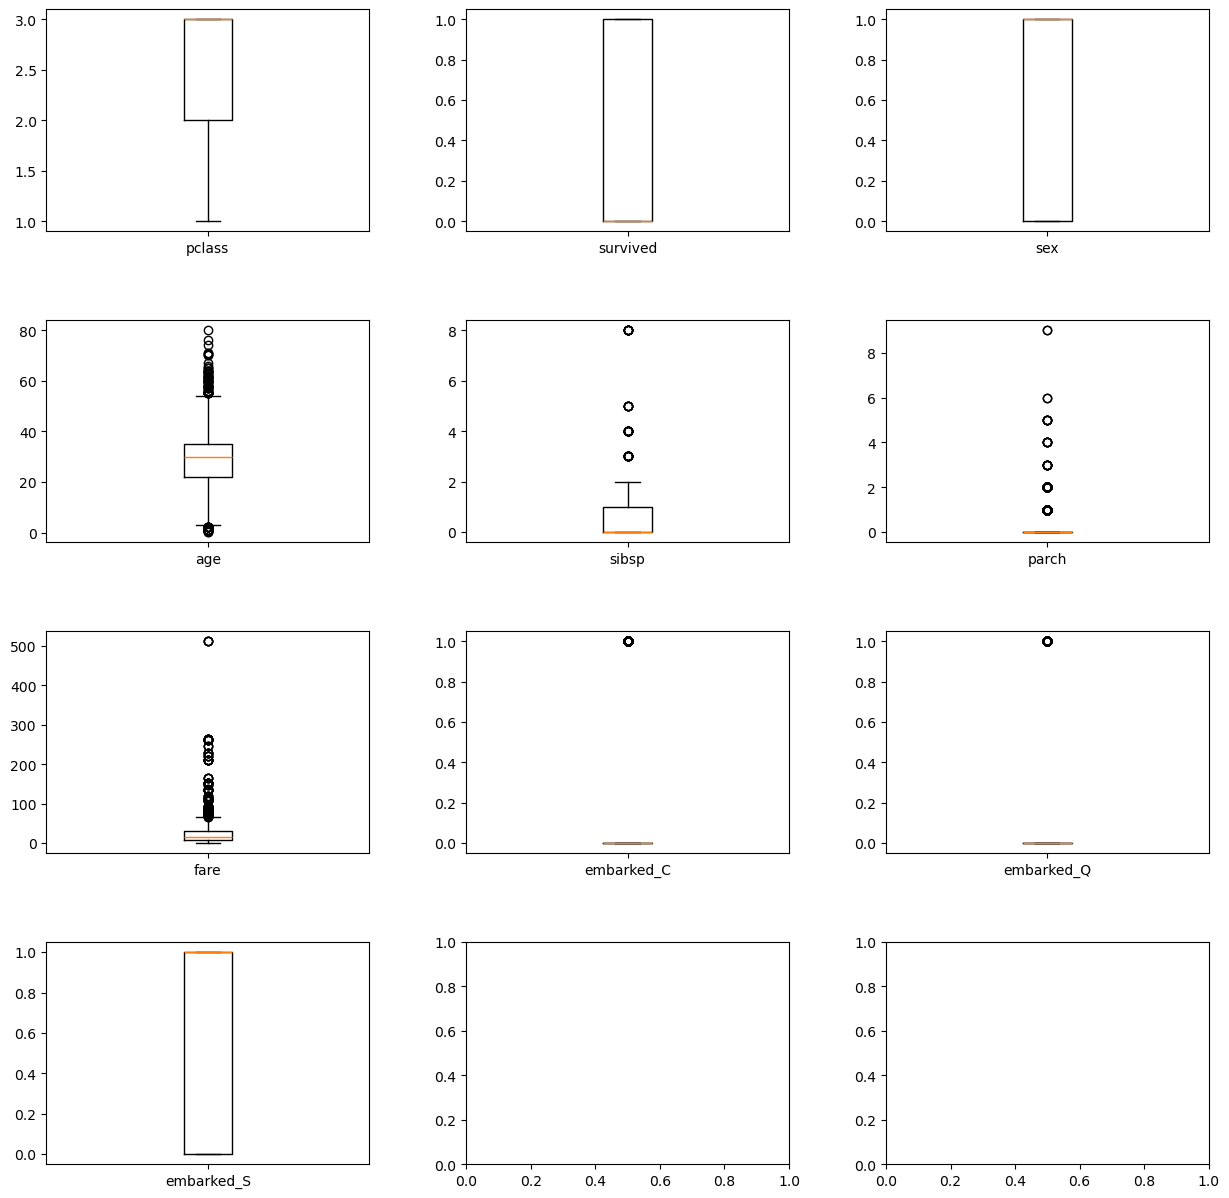

In [5]:
import matplotlib.pyplot as plt

labels = df3.columns.to_list()

fig, ax = plt.subplots(4, 3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.3) 

for i in range(10):
    ax[i // 3, i % 3].boxplot(df3.loc[:,[labels[i]]], tick_labels = [labels[i]])

plt.show()

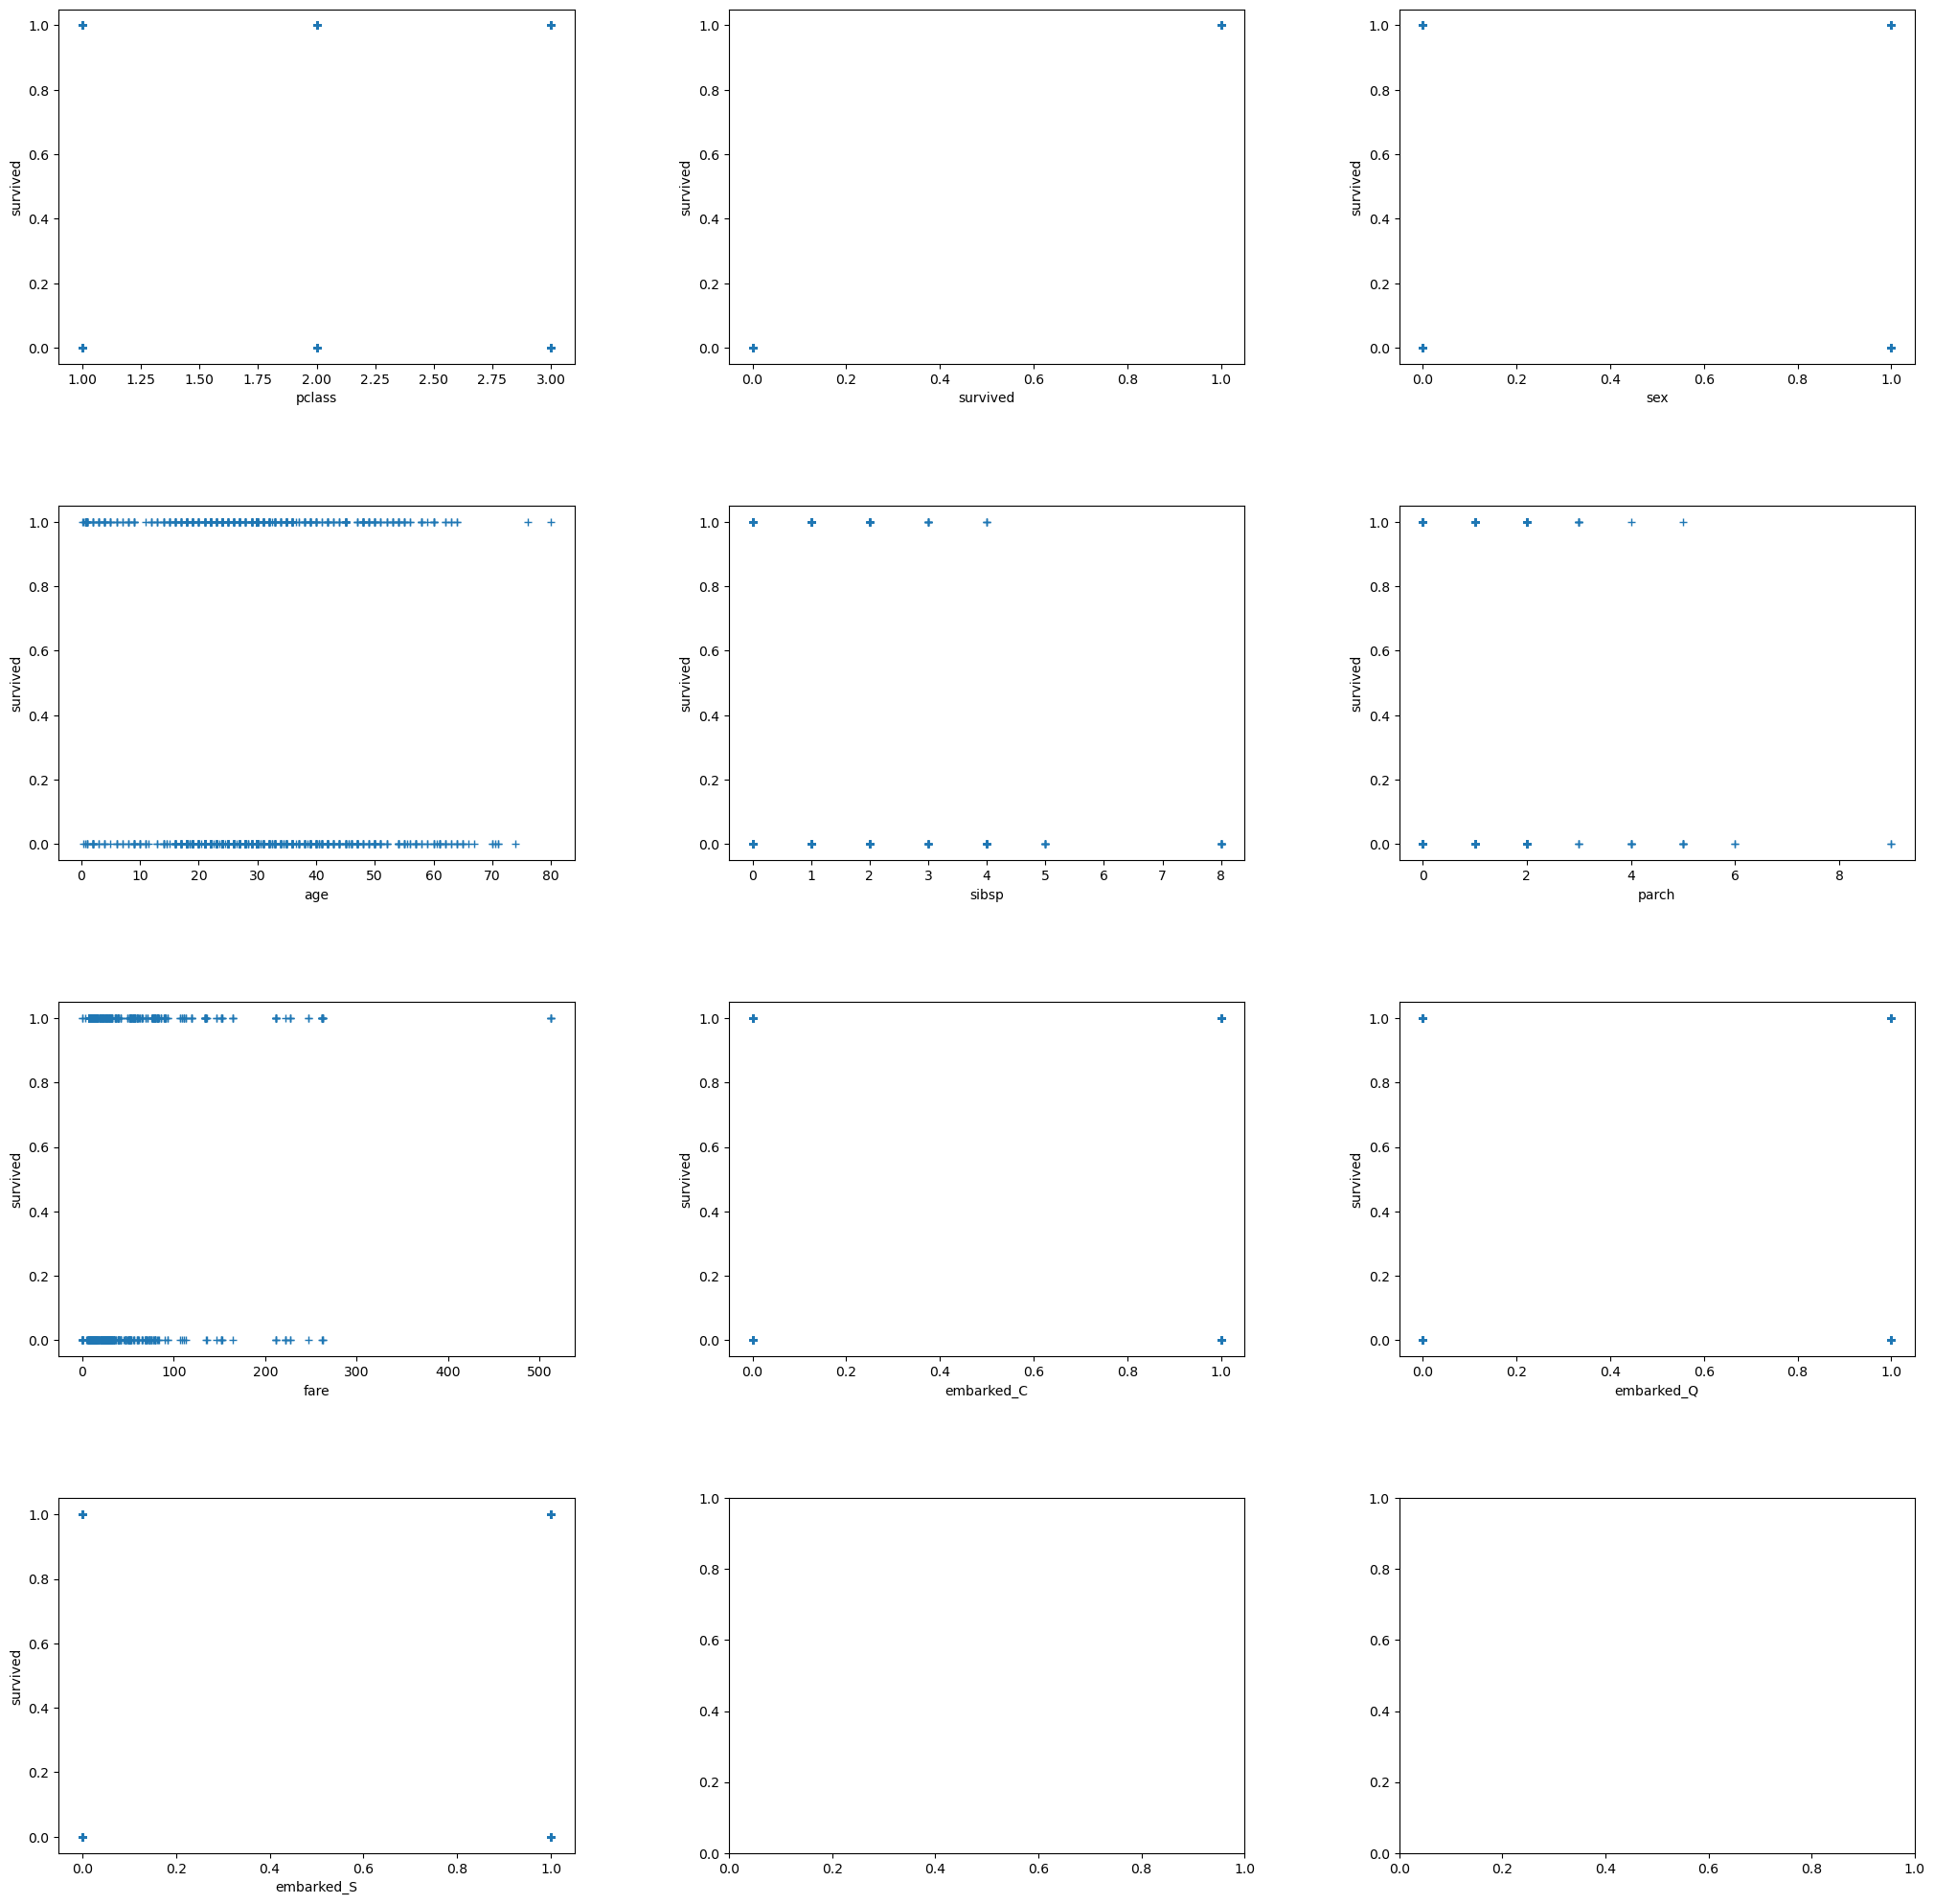

In [6]:
fig, ax = plt.subplots(4, 3, figsize=(25, 25))
fig.subplots_adjust(hspace=0.4, wspace=0.3) 

for i in range(10):
    ax[i // 3, i % 3].plot(df3.loc[:,[labels[i]]],df3.loc[:,[labels[1]]], '+')
    ax[i // 3, i % 3].set_ylabel('survived')
    ax[i // 3, i % 3].set_xlabel(labels[i])

plt.show()

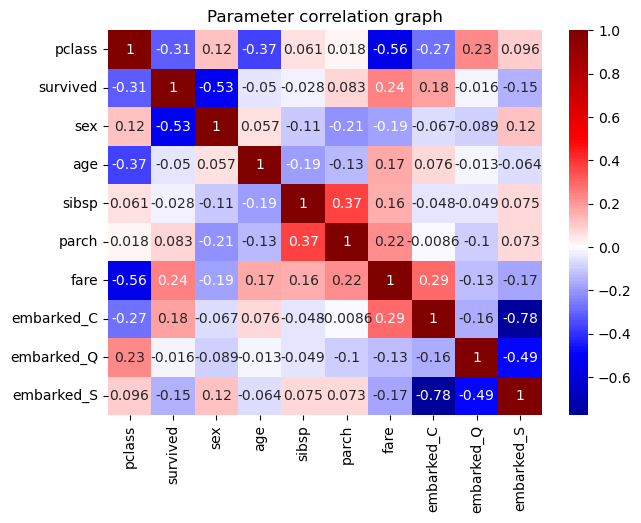

In [7]:
import seaborn as seaborn
plt.figure(figsize=(7, 5))
seaborn.heatmap(df3.corr(), annot=True, cmap='seismic', center=0)
plt.title('Parameter correlation graph')
plt.show()

In [8]:
df3.columns.to_list()

['pclass',
 'survived',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked_C',
 'embarked_Q',
 'embarked_S']

In [9]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = df3.loc[:,['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked_C', 'embarked_Q', 'embarked_S']].to_numpy()
y = df3.loc[:,['survived']].to_numpy().flatten()

print('коробочное решение')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

#clf.predict_proba(X[:2, :])
#clf.score(X, y)

reg = LogisticRegression().fit(x_train, y_train)
r = reg.score(x_train, y_train)
print('метрика обучения: ', round(reg.score(x_train, y_train), 2))
coef = reg.coef_
#print('коэффициенты: ', list(map(lambda x: round(x, 2), coef[0])))
print('коэффициенты: ', coef[0])
b = reg.intercept_
print('коэффициент b: ', round(b[0], 2))
print('метрика теста: ', round(reg.score(x_test, y_test), 2))

коробочное решение
метрика обучения:  0.79
коэффициенты:  [-8.19244375e-01 -2.45012226e+00 -2.82142830e-02 -2.82481763e-01
 -8.12480644e-03  2.05274093e-03  1.23605223e+00  6.52869195e-01
  6.29392423e-01]
коэффициент b:  2.93
метрика теста:  0.78


D:\zmei\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
import math as m

print('ручное решение')

w : list = [] #массив коэффициентов
for i in range(len(x_train[0])):
    w.append(0)
b = 1
error = 1

l_rate = 0.01
max_num_steps = 10000
max_error = 0.01

summ : list = []
for j in range(len(x_train[0]) + 2):
    summ.append(0)
        
for i in range(max_num_steps):

    for j in range(len(x_train[0]) + 2):
        summ[j] = 0
        
    for j in range(len(x_train)):
        vir = 0
        vir2 = 0
        vir3 = 0
        for k in range(len(x_train[0])):
            vir += (w[k]*x_train[j][k])
        vir = vir + b 
        vir2 = 1 / (1 + m.exp(-vir)) - y_train[j]
        vir3 = (1 + m.exp(-vir)) ** 2
        vir4 = 2 * vir2 * m.exp(-vir) / vir3
        for k in range(len(x_train[0])):
            summ[k] += (vir4 * (x_train[j][k]))
        summ[len(x_train[0])] += vir4
        summ[len(x_train[0]) + 1] += vir2 ** 2
    for j in range(len(x_train[0]) + 2):
        summ[j] /= len(x_train)
    for j in range(len(x_train[0])):
        w[j] -= l_rate * summ[j]
    b -= l_rate * summ[len(x_train[0])]
    error = summ[len(x_train[0]) + 1]
    if i % 100 == 0:
        print('iter: ', i, 'error: ', error)
    if error < max_error:
        break

ручное решение
iter:  0 error:  0.3610546390142237
iter:  100 error:  0.2183169246932506
iter:  200 error:  0.2099324642016548
iter:  300 error:  0.2037188356611858
iter:  400 error:  0.199231438986695
iter:  500 error:  0.19589522783574728
iter:  600 error:  0.19327977216211137
iter:  700 error:  0.19111514161750895
iter:  800 error:  0.18924236013116047
iter:  900 error:  0.18756914012550804
iter:  1000 error:  0.18691587881918537
iter:  1100 error:  0.18558012106069843
iter:  1200 error:  0.1844133663604304
iter:  1300 error:  0.18331499035092652
iter:  1400 error:  0.1822746072998985
iter:  1500 error:  0.18128486524454804
iter:  1600 error:  0.1803403560274186
iter:  1700 error:  0.17943695368690715
iter:  1800 error:  0.1785714027420397
iter:  1900 error:  0.17774105514257182
iter:  2000 error:  0.1769436977236361
iter:  2100 error:  0.17617743615643955
iter:  2200 error:  0.17544061508868503
iter:  2300 error:  0.1747317620631355
iter:  2400 error:  0.17404954743676068
iter:  25

In [67]:
print(w, b, error)

[np.float64(-0.34629036773165006), np.float64(-1.8371632875886823), np.float64(-0.011548048234829123), np.float64(-0.22313579354034824), np.float64(0.028159041904023928), np.float64(0.0036668487662904585), np.float64(0.3832954620352134), np.float64(0.0276891562200996), np.float64(-0.012745898518348037)] 1.4200555441931755 0.15687206440039317


In [68]:
def accuracy(true, predict) -> int:
    ok = 0
    for i in range(len(true)):
        if true[i] == predict[i]:
            ok += 1
    return ok / len(true)    

In [75]:
def hand_fun(w, b, x) -> int:
    vir = 0
    for k in range(len(x)):
        vir += (w[k]*x[k])
    vir += b 
    res = 1 / (1 + m.exp(-vir))
    if res <= 0.5:
        res = 0
    else:
        res = 1
    return res

In [76]:
y_pred_train : list = []
y_pred_test : list = []
for i in range(len(x_train)):
    y_pred_train.append(hand_fun(w, b, x_train[i]))
for i in range(len(x_test)):
    y_pred_test.append(hand_fun(w, b, x_test[i]))

print('коробочное решение / ручное решение')
print('метрика обучения: ', round(reg.score(x_train, y_train), 2), '/', accuracy(y_train, y_pred_train))
print('коэффициенты (коробка): ', coef[0])
print('коэффициенты (руки): ', w)
print('коэффициент b: ', round(reg.intercept_[0], 2), '/', b)
print('метрика теста: ', round(reg.score(x_test, y_test), 2), '/', accuracy(y_test, y_pred_test))

коробочное решение / ручное решение
метрика обучения:  0.79 / 0.797962648556876
коэффициенты (коробка):  [-8.19244375e-01 -2.45012226e+00 -2.82142830e-02 -2.82481763e-01
 -8.12480644e-03  2.05274093e-03  1.23605223e+00  6.52869195e-01
  6.29392423e-01]
коэффициенты (руки):  [np.float64(-0.34629036773165006), np.float64(-1.8371632875886823), np.float64(-0.011548048234829123), np.float64(-0.22313579354034824), np.float64(0.028159041904023928), np.float64(0.0036668487662904585), np.float64(0.3832954620352134), np.float64(0.0276891562200996), np.float64(-0.012745898518348037)]
коэффициент b:  2.93 / 1.4200555441931755
метрика теста:  0.78 / 0.7709923664122137
